In [1]:
%matplotlib inline

import shm
import numpy
import networkx
import matplotlib
import seaborn as sns
import pandas as pd
import pickle
import pymc3 as pm

In [2]:
import arviz as az
import shm.plot as sp
import matplotlib.pyplot as plt
import seaborn as sns
from shm.models.hlm import HLM

In [3]:
%pylab inline
pylab.rcParams['figure.figsize'] = (6, 3)

Populating the interactive namespace from numpy and matplotlib


In [4]:
sns.set_style(
  "white",
  {
      "xtick.bottom": True,
      "ytick.left": True,
      "axes.spines.top": False,
      "axes.spines.right": False,
  },
)

# Model evaluation

In [5]:
readout_file = "../data_raw/easy_simulated_data/small-simulated_data.tsv"
graph_file = "../data_raw/easy_simulated_data/small-graph.tsv"
data_file = "../data_raw/easy_simulated_data/small-data.pickle"

In [6]:
def _read_graph(infile, data):    
    genes = numpy.unique(data["gene"].values)
    G = networkx.read_edgelist(
      infile,
      delimiter="\t",
      data=(('weight', float),),
      nodetype=str)
    G = G.subgraph(numpy.sort(genes))
    data = data[data.gene.isin(numpy.sort(G.nodes()))]
    return G, data

## Small simple model

In [33]:
trace_dir = "../results/small_simple_model_trace"
with open(data_file, "rb") as fh:    
    data = pickle.load(fh)

In [34]:
readout = pd.read_csv(readout_file, sep="\t")
graph, _ = _read_graph(graph_file, readout)

In [ ]:
networkx.draw(graph.subgraph(data['essential_genes']), with_labels=True, node_size=20)

In [35]:
with HLM(readout) as model:
    trace = pm.load_trace(trace_dir, model = model.model)

Building simple hierarchical model


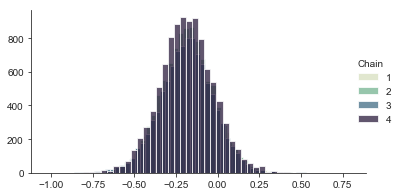

In [36]:
sp.plot_hist(trace, "gamma", 0, "");

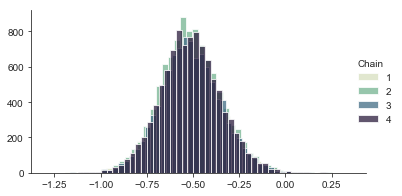

In [37]:
sp.plot_hist(trace, "gamma", 1, "");

In [48]:
data['gamma']

array([-1.        , -0.06117564])

In [40]:
numpy.mean(trace['gamma'], 0)

array([-0.18657483, -0.51394251])

In [42]:
data['beta']

array([-1.05281718, -1.10729686, -0.91345924, -1.23015387, -0.82551882,
       -0.13729633, -0.02927173, -0.08611268,  0.08503515, -0.26718971])

In [43]:
numpy.mean(trace['beta'], 0)[list(model._beta_idx_to_gene_cond.keys())]

array([-0.69303458, -0.83748557, -0.36598819, -1.13833843, -0.10865165,
       -0.22755621,  0.06793616, -0.16688222,  0.34094731, -0.56337918])

## Small clustering model

In [44]:
trace_dir = "../results/small_clustering_model_trace"
with open(data_file, "rb") as fh:    
    data = pickle.load(fh)

In [45]:
readout = pd.read_csv(readout_file, sep="\t")
graph, _ = _read_graph(graph_file, readout)

In [51]:
with HLM(readout, model="clustering") as model:
    trace = pm.load_trace(trace_dir, model = model.model)

Building cluster hierarchical model


In [53]:
sp.plot_hist(trace, "gamma", 0, "");

ValueError: need at least one array to concatenate

In [ ]:
sp.plot_hist(trace, "gamma", 1, "");

In [ ]:
data['gamma']

In [47]:
numpy.mean(trace['gamma'], 0)

array([-0.16282134, -0.58602441])

In [48]:
numpy.mean(trace['z'], 0)

array([0.2466 , 0.60005])

In [ ]:
data['beta']

In [ ]:
numpy.mean(trace['beta'], 0)[list(model._beta_idx_to_gene_cond.keys())]

## Small MRF model

In [54]:
trace_dir = "../results/small_mrf_model_trace"
with open(data_file, "rb") as fh:
    data = pickle.load(fh)

In [55]:
readout = pd.read_csv(readout_file, sep="\t")
graph, _ = _read_graph(graph_file, readout)

In [56]:
with HLM(readout, model="mrf", graph=graph) as model:
    trace = pm.load_trace(trace_dir, model = model.model)

Building mrf hierarchical model


In [57]:
data['gamma']

array([-1.        , -0.06117564])

In [58]:
numpy.mean(trace['gamma'], 0)

array([-0.09400694, -1.00154724])

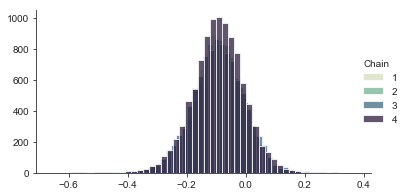

In [59]:
sp.plot_hist(trace, "gamma", 0, "");

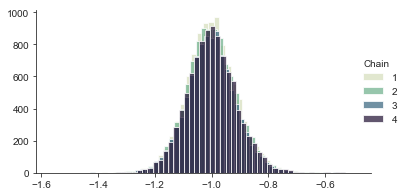

In [60]:
sp.plot_hist(trace, "gamma", 1, "");

In [61]:
numpy.mean(trace['z'], 0)

array([0.4786  , 0.636425])

In [62]:
data['beta']

array([-1.05281718, -1.10729686, -0.91345924, -1.23015387, -0.82551882,
       -0.13729633, -0.02927173, -0.08611268,  0.08503515, -0.26718971])

In [63]:
numpy.mean(trace['beta'], 0)[list(model._beta_idx_to_gene_cond.keys())]

array([-1.04078555, -1.09796133, -0.90957523, -1.21867064, -0.80656429,
       -0.1271084 , -0.00953171, -0.10283612,  0.10056849, -0.26158091])

In [16]:
P1 = numpy.mean(trace['z'], 0)
P0 = 1 - P1

prob_table = pd.DataFrame(
    {"p": np.concatenate((P0, P1)), 
     "k": ["No-hit", "No-hit", "Hit", "Hit"],
     "g": ["G0", "G1", "G0", "G1"]
    })

In [17]:
cols = sns.color_palette("RdBu", n_colors=7)
cols = ["#E84646", "#316675"]

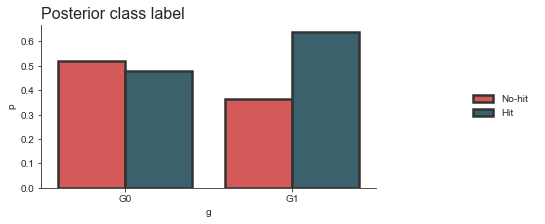

In [18]:
ax = sns.barplot(x="g", y="p", hue="k", data=prob_table, palette=cols,
                 linewidth=2.5, edgecolor=".2");
sns.despine();
plt.title('Posterior class label', loc = 'left', fontsize = 16)
ax.legend(loc='center right', fancybox=False, framealpha=0, shadow=False, borderpad=1,
          bbox_to_anchor=(1.5, 0.5), ncol=1);

/home/simon/miniconda3/envs/ml/lib/python3.6/site-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


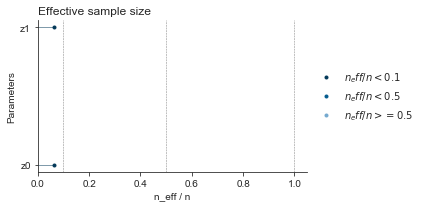

In [19]:
sp.plot_neff(trace, "z");

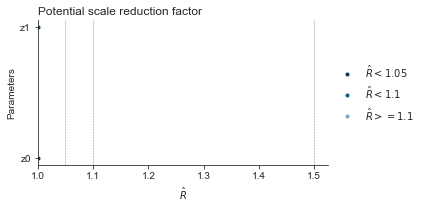

In [20]:
sp.plot_rhat(trace, "z");

In [21]:
with model.model:
    ppc_trace = pm.sample_posterior_predictive(trace, 25000, random_seed=1)

100%|██████████| 25000/25000 [00:15<00:00, 1653.62it/s]


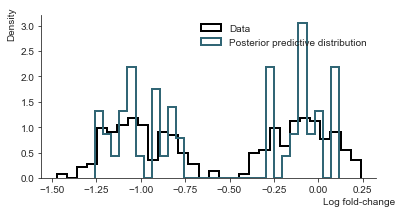

In [32]:
sp.plot_steps(readout, ppc_trace, bins=30);

/home/simon/miniconda3/envs/ml/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


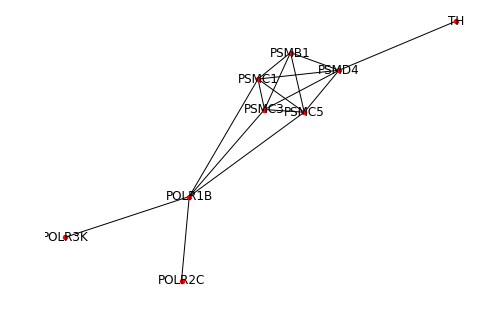

In [52]:
networkx.draw(graph.subgraph(data['essential_genes']), with_labels=True, node_size=20)